In [ ]:
# restart the kernel to clear past work
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
# This code evolves the Einstein-Klein Gordon system of equations in the 3+1 decomposition 
# using the reference metric approach in arXiv:1211.6632
# to avoid coordinate singularities in the right hand side evolution
# Spherical symmetry is assumed and the outer boundary condition is 
# extrapolation at zeroth order

# load the required python modules
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import time
import random
import sys
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# homemade code
sys.path.append('../')
from source.rhsevolution import *              # go here to look at how the evolution works
from source.mytests import *                   # go here to change the test conditions
from source.diagnostics import *               # go here to change the  diagnostics

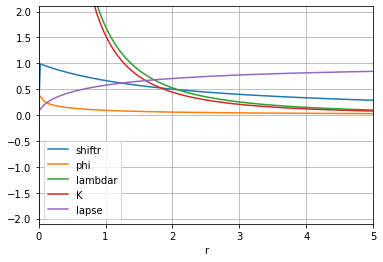

In [2]:
# Input parameters for grid and evolution here
N_r = 200 # num points on physical grid
R = 10.0 # Maximum outer radius
dx = R/N_r # grid spacing
oneoverdx = 1.0/dx

# Test the rhs values, use eddington finkelstein which has non trivial Kij and shift
r, initial_vars_values = get_test_vars_values_bh(R, N_r)

#unpackage the vector for readability
u, v , phi, hrr, htt, hpp, K, arr, att, app, lambdar, shiftr, br, lapse = unpack_vars_vector(initial_vars_values, N_r)

#plot initial conditions
plt.xlabel('r')
plt.plot(r, shiftr, label='shiftr')
plt.plot(r, phi, label='phi')
#plt.plot(r, hrr, label='hrr')
#plt.plot(r, htt, label='htt')
plt.plot(r, lambdar, label='lambdar')
#plt.plot(r, arr, label='arr')
plt.plot(r, K, label='K')
plt.plot(r, lapse, label='lapse')
plt.ylim(-2.1,2.1)
plt.xlim(0.0,5.0)
plt.legend(loc='best')
plt.grid()

khere = K

(-1.0, 1.0)

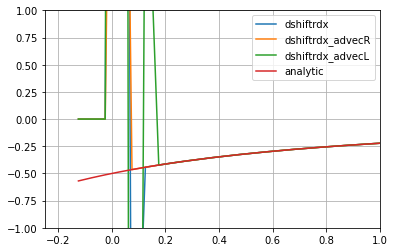

In [3]:
# Little check that advection derivatives work the right way around 
# - in this case advecR should give better result
H = 2.0 / r
dHdr = - 2.0 / r / r
grr = 1.0 + H
analytic_dshiftdr = dHdr/grr - 1/grr/grr * dHdr * H
dsdx = get_dfdx(shiftr, oneoverdx)
dsdx_advec_R = get_dfdx_advec_R(shiftr, oneoverdx)
dsdx_advec_L = get_dfdx_advec_L(shiftr, oneoverdx)
plt.plot(r, dsdx, label='dshiftrdx')
plt.plot(r, dsdx_advec_R, label='dshiftrdx_advecR')
plt.plot(r, dsdx_advec_L, label='dshiftrdx_advecL')
plt.plot(r, analytic_dshiftdr, label='analytic')
plt.legend(loc='best')
plt.grid()
plt.xlim(-0.25,1.0)
plt.ylim(-1.0,1.0)

  0%|                                                   | 0/1000 [00:00<?, ?‰/s]

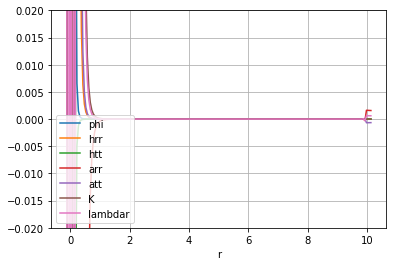

In [4]:
# calculate the rhs values and plot them
progress_bar = tqdm(total=1000, unit="‰")
eta = 1.0
solution = get_rhs(0.0, initial_vars_values, R, N_r, eta, progress_bar, [0, 1])

#unpackage the vector for readability
u, v, phi, hrr, htt, hpp, K, arr, att, app, lambdar, shiftr, br, lapse = unpack_vars_vector(solution, N_r)

#plot rhs - all those for the metric components should be zero modulo boundary issues
plt.xlabel('r')
plt.plot(r, phi, label='phi')
plt.plot(r, hrr, label='hrr')
plt.plot(r, htt, label='htt')
plt.plot(r, arr, label='arr')
plt.plot(r, att, label='att')
plt.plot(r, K, label='K')
plt.plot(r, lambdar, label='lambdar')
plt.ylim(-0.02,0.02)
#plt.xlim(0.15,0.9)
plt.legend(loc='best')
plt.grid()